**Assignment 2 - Logistic Regression Model.**.  
**Feature Set - 10,000 Samples**
**(Training Samples - 8000, Testing Samples - 2000)**




In [95]:
#GENERATE DUMMY DATASET
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Generate Dummmy Dataset of 10000 samples
np.random.seed(12)
num_observations = 5000

x1= np.random.multivariate_normal([0,0],[[1,.75],[.75,1]],num_observations)
x2= np.random.multivariate_normal([1,4],[[1,.75],[.75,1]],num_observations)

#Features and labels dataset
features = np.vstack((x1,x2)).astype(np.float32)
labels = np.hstack((np.full(num_observations,-1),np.ones(num_observations))).astype(int)

#Combined the respective feaures and labels into one numpy array
dataset_with_labels = np.column_stack((features,labels))

#Randomly divided the combined dataset created above into training dataset (80%) and testing dataset(20%)
training_data_count = int((80 * len(dataset_with_labels))/100)
testing_data_count = int((20 * len(dataset_with_labels))/100)
training_index = np.random.randint(dataset_with_labels.shape[0], size=training_data_count)
testing_index = np.random.randint(dataset_with_labels.shape[0], size=testing_data_count)
training_data = dataset_with_labels[training_index,:]
testing_data = dataset_with_labels[testing_index,:]

# Separate the training data and labels from the combined training dataset
#Used this for training
training_dataset=training_data[:,:-1]
training_labels=training_data[:,2]

#Separate the testing data and test labels from the combined testing dataset
#Used this for testing
testing_dataset=testing_data[:,:-1]
testing_labels=testing_data[:,2]

#Training dataset with bias (added one at the end of the dataset)
training_dataset_with_bias=np.insert(training_dataset,training_dataset.shape[1],1,axis=1)

#Testing dataset with bias (added one at the end of dataset)
testing_dataset_with_bias=np.insert(testing_dataset,testing_dataset.shape[1],1,axis=1)


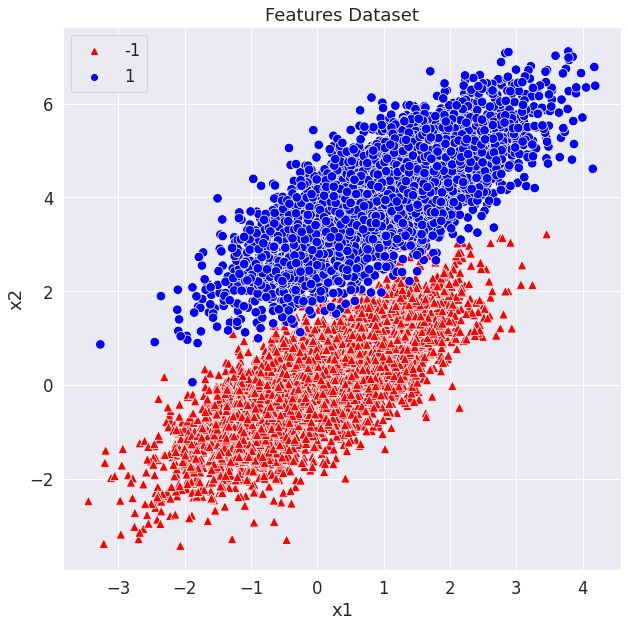

In [96]:
#SCATTERPLOT OF OUR DATASET

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title("Features Dataset")
plt.xlabel("x1")
plt.ylabel("x2")
plot=sns.scatterplot(x=features[:,0], y=features[:,1], hue=labels, s=90 ,style=labels,palette =["red","blue"],markers=["^","o"])


In [97]:
#GRADIENT CALCULATION

#Return the gradient value for entire dataset in the form of (8000,2) array
def calc_gradient(features,label,weights): 
  #Transpose to get the array in the form of (8000,2)
  gradient_value = - ((label*features.T)/(1+np.exp(label*np.dot(features,np.transpose(weights))))).T
  return gradient_value

In [98]:
#COST FUNCTION CALCULATION

#Return Cost Function for entire dataset
#No regularization part included
def cost_function(features,label,weights):
  cost_function_value=(np.sum(np.log(1+np.exp(-label*np.dot(features,weights)))))/len(label)
  #Return the cost function with precision set to .17f
  return f"{cost_function_value:.17f}"

In [99]:
#TRAINING LR MODEL

#Call calc_gradient to get the gradient for entire training dataset and then calculate the average
#Optimizes the weights according to gradient of cost function
#Call cost_function to get the cost function for entire training dataset for each optimized weight
#Returns the optimized weights
def logistic_regression_PB(features,label,num_steps,learning_rate):
  weights = np.zeros(features.shape[1])
  prev_cf = []
  count=0
  #Start from 1 till num_step to print the value at 1000th iteration
  for step in range(1,num_steps+1):
    #Call gradient function to get the gradient of cost function
    gradient = calc_gradient(features,label,weights)

    #Find average gradient
    avg_gradient = np.mean(gradient,axis=0)

    #Update the weights
    weights -= learning_rate * avg_gradient

    #Check if cost function is decreasing,if not, stop the iteration as we 
    #got the optimized w and print that weight and cost function and return 
    #that weight
    if step % 1000 == 0:
      cf_value = cost_function(features,label,weights)
      prev_cf.append(cf_value)
      if (len(prev_cf) > 1):
        #Compare the cost function with the previous iterations cost function value
        if (prev_cf[len(prev_cf)-2] == cf_value):
          count += 1;
          #If more than once the value remain same then print the value and break the loop
          if (count > 0):
            print(cf_value,weights)
            break
      print(cf_value,weights)
  return weights

In [100]:
#SIGMOID FUNCTION

#Sigmoid Function - To find the label for test data
#Returns the sigmoid value for fx i.e weights*input 
def sigmoid(features,weights):
  return 1 / (1 + np.exp(- np.dot(features,weights.T)))

In [101]:
#TESTING OF TEST DATASET

#Perform predictions on the test dataset
#Returns the predictions and the count of correct predictions on test dataset
def predict_label(dataset,weights,actual_labels):
  predicted_class=[]

  #Get the sigmoid values 
  sigma_fx=sigmoid(dataset,weights)

  #Compare the sigmoid values to get the class label
  #If sigma_fx > 0.5 then label is +1 else label is -1
  for result in sigma_fx:
    if (result >= 0.5):
      predicted_class.append(+1)
    else:
      predicted_class.append(-1)

  #Calculate the number of correct predictions
  correct_prediction_count=np.count_nonzero(predicted_class==actual_labels)

  return correct_prediction_count, predicted_class

In [102]:
#IMPLEMENTATION OF SKLEARN LOGISTIC REGRESSION MODEL

# Returns the accuracy and the confusions matrix
def sklearn_logistic_regression(intercept,training_dataset,training_labels,testing_dataset,testing_labels):
  #Create instance of LR model with the bias set according to the passed values
  logistic_regression = LogisticRegression(fit_intercept=intercept)

  #Train the model with training data
  logistic_regression.fit(training_dataset, training_labels)

  #Prediction on testing dataset
  predictions = logistic_regression.predict(testing_dataset)

  #Use score method to get accuracy of model
  accuracy = logistic_regression.score(testing_dataset, testing_labels)

  #Confusion matrix
  confusion_matrix = metrics.confusion_matrix(testing_labels, predictions)

  #Optimized Weights
  optimized_wts = logistic_regression.coef_

  #Optimized intercept
  optimized_intercept = logistic_regression.intercept_

  #If the model is trainined with intercept return optimized intercept
  if (intercept == True):
    return accuracy, confusion_matrix,optimized_wts,optimized_intercept
  else:
    return accuracy, confusion_matrix,optimized_wts

In [103]:
#TRAINING OUR LOGISTIC REGRESSION MODEL

# TRAIN WITHOUT INTERCEPT
#Set the hyperparameters - Learning Rate and the number of iterations
#Set to the values that converge quickly and get the optimized values
learning_rate = 0.1
num_steps = 30000
print("*****************************************************************\n"
       +"*      Training Logistic Regression Model With No Intercept     *\n"
       +"*****************************************************************")
print("Learning Rate used : ",learning_rate)
print("Num of iterations : ",num_steps)

# Call logistic_regression_PB to train the model
print("\nCost Function values and weights at every 1000th iteration without intercept :")
weights_without_bias=logistic_regression_PB(training_dataset,training_labels,num_steps,learning_rate)

# TRAIN WITH INTERCEPT
#Set the hyperparameters - Learning Rate and the number of iterations
learning_rate_with_intercept = 0.1
num_steps_with_intercept = 30000

print("\n**************************************************************\n"
       +"*    Training Logistic Regression Model With Intercept       *\n"
       +"**************************************************************")
print("Learning Rate used : ",learning_rate_with_intercept)
print("Num of iterations : ",num_steps_with_intercept)

# Call logistic_regression_PB to train the model
print("\nCost Function values and weights at every 1000th iteration with intercept :")
weights_with_bias=logistic_regression_PB(training_dataset_with_bias,training_labels,num_steps_with_intercept,learning_rate_with_intercept)

*****************************************************************
*      Training Logistic Regression Model With No Intercept     *
*****************************************************************
Learning Rate used :  0.1
Num of iterations :  30000

Cost Function values and weights at every 1000th iteration without intercept :
0.40470518060588651 [-0.68573728  1.01585006]
0.40470509344050587 [-0.68722431  1.01664168]
0.40470509344009609 [-0.68722753  1.0166434 ]
0.40470509344009603 [-0.68722754  1.0166434 ]
0.40470509344009603 [-0.68722754  1.0166434 ]

**************************************************************
*    Training Logistic Regression Model With Intercept       *
**************************************************************
Learning Rate used :  0.1
Num of iterations :  30000

Cost Function values and weights at every 1000th iteration with intercept :
0.04982812510334706 [-1.30339672  2.5076887  -4.01050609]
0.03430939693334665 [-1.7057205   3.0750422  -5.02199822]
0.0

In [104]:
#OUR LR MODEL RESULT AND SKLEARN LR MODEL RESULTS

#Comparisson of LR model and the SKLearn LR model
#Display the accuracy, confusion matrix and the optimized weights,intercepts

#Our trained model results
print ("###########################################\n"
      +"##   Logistic Regression Model Result    ##\n"
      +"###########################################")
print("Training Samples used : ",len(training_dataset))
print("Testing Samples used : ",len(testing_dataset))

print("\n******* Testing with no intercept *******")
correct_prediction_count,predicted_class_without_bias=predict_label(testing_dataset,weights_without_bias,testing_labels)
print("Learning Rate used to get the optimized results :",learning_rate)
print("Number of iterations :",num_steps)
print("Correct predicted testing labels count without intercept : ",correct_prediction_count)
print("Testing Accuracy with no intercept : ",(correct_prediction_count/len(testing_labels))*100,"%")
print("Confusion Matrix with no intercept : \n",metrics.confusion_matrix(testing_labels, predicted_class_without_bias))
print("Final weights with no intercept : ",weights_without_bias)

print("\n******* Testing with intercept *******")
correct_prediction_count_with_bias,predicted_class_with_bias=predict_label(testing_dataset_with_bias,weights_with_bias,testing_labels)
print("Learning Rate used to get the optimized results : ",learning_rate_with_intercept)
print("Number of iterations : ",num_steps_with_intercept)
print("Correct predicted testing labels count with intercept : ",correct_prediction_count_with_bias)
print("Testing Accuracy with intercept : ",(correct_prediction_count_with_bias/len(testing_labels))*100,"%")
print("Confusion Matrix with intercept : \n",metrics.confusion_matrix(testing_labels, predicted_class_with_bias))
print("Final weights with intercept : ",weights_with_bias)

#SKLearn results
print ("\n################################################\n"
      +"##  SKLearn Logistic Regression Model Result  ##\n"
      +"################################################")
accuracy_without_bias,cm_without_bias,optimized_wts_without_bias = sklearn_logistic_regression(False,training_dataset,training_labels,testing_dataset,testing_labels)
print("\n******* Testing with no intercept *******")
print("Testing Accuracy with no intercept : ", accuracy_without_bias *100,"%")
print("Confusion Matrix with no intercept : \n",cm_without_bias)
print("Final weights with no intercept : ",optimized_wts_without_bias)

accuracy_with_bias,cm_with_bias,optimized_wts_with_bias,optimized_intercept = sklearn_logistic_regression(True,training_dataset,training_labels,testing_dataset,testing_labels)
print("\n******* Testing with intercept *******")
print("Testing Accuracy with intercept : ", accuracy_with_bias *100,"%")
print("Confusion Matrix with intercept : \n",cm_with_bias)
print("Final weights and intercept value : ",optimized_wts_with_bias,optimized_intercept)

###########################################
##   Logistic Regression Model Result    ##
###########################################
Training Samples used :  8000
Testing Samples used :  2000

******* Testing with no intercept *******
Learning Rate used to get the optimized results : 0.1
Number of iterations : 30000
Correct predicted testing labels count without intercept :  1540
Testing Accuracy with no intercept :  77.0 %
Confusion Matrix with no intercept : 
 [[ 514  460]
 [   0 1026]]
Final weights with no intercept :  [-0.68722754  1.0166434 ]

******* Testing with intercept *******
Learning Rate used to get the optimized results :  0.1
Number of iterations :  30000
Correct predicted testing labels count with intercept :  1990
Testing Accuracy with intercept :  99.5 %
Confusion Matrix with intercept : 
 [[ 968    6]
 [   4 1022]]
Final weights with intercept :  [ -3.53841596   5.9635158  -10.11978232]

################################################
##  SKLearn Logistic Regression